In [1]:
using JLD, Mamba
using Pipe
include("gyncycle.jl")

acceptance(mc::Array) = mapslices(mc,[1,2]) do mc
    n = size(mc,1)
    sum([mc[i,:,:] != mc[i+1,:,:] for i in 1:n-1]) / (n-1);
  end |> vec

acceptance(c::AbstractChains) = acceptance(c.value)

mergeparms!(aparms, sparms) = (aparms[SAMPLEPARMS]=sparms; aparms)

mergeparms(aparms,sparms) = mergeparms!(copy(aparms), sparms)

function loglikelihood(mc::Array{Float64,3}, data::Matrix)
    mapslices(mc.value, 2) do modelparms
        aparms = mergeparms(parms, modelparms[1:length(SAMPLEPARMS)])
        y0 = modelparms[length(SAMPLEPARMS)+1:end]
        loglikelihood(data, aparms, y0)
    end
end

mergepersons(mcs) = cat(3,map(x->x[1:minimum(map(x->size(x,1), mcs)),:,:],mcs)...);

loglikelihood(mc::AbstractChains, data::Matrix) = loglikelihood(mc.value, data);

function newestjld()
    jlds = filter(x->endswith(x, "jld"), readdir())
    file = jlds[indmax(map(x->stat(x).mtime, jlds))]
end;

file: samm aall p3-r0.1-sy10-spar10-spro0.05-2truncflatprior.jld
  0.201953 seconds (428 allocations: 244.809 MB, 61.25% gc time)
size: (31000,115,3)
acc:  

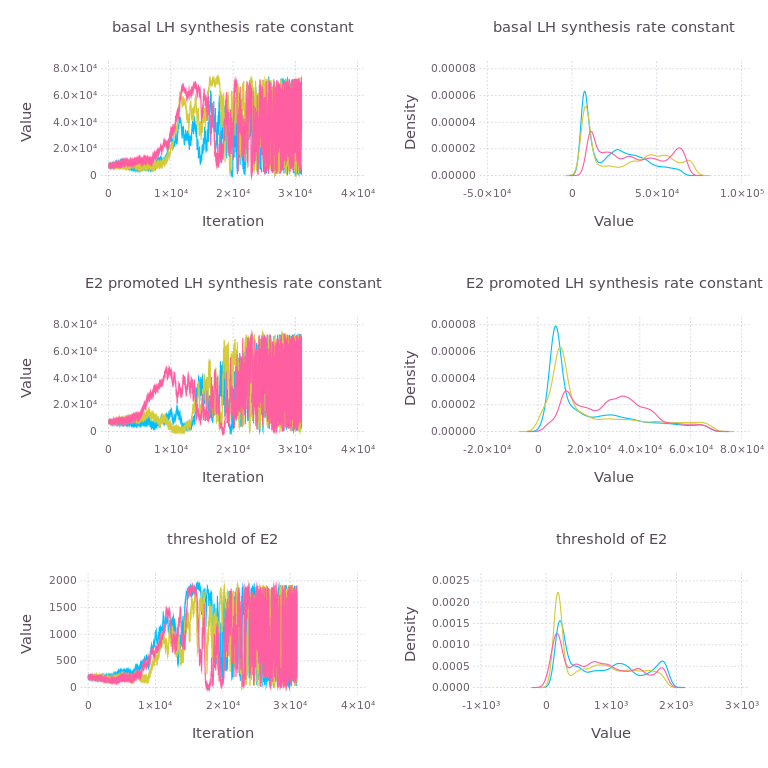

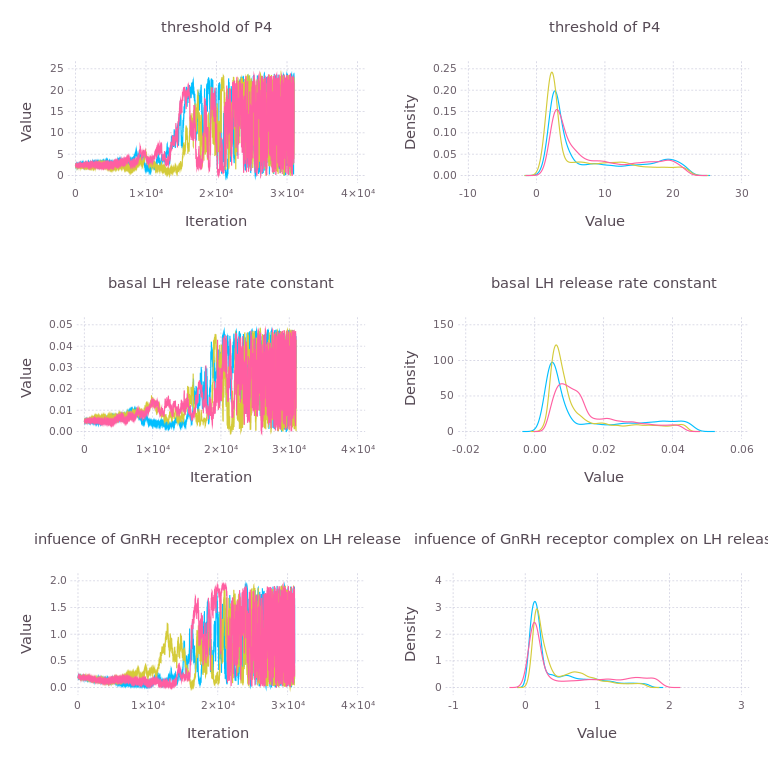

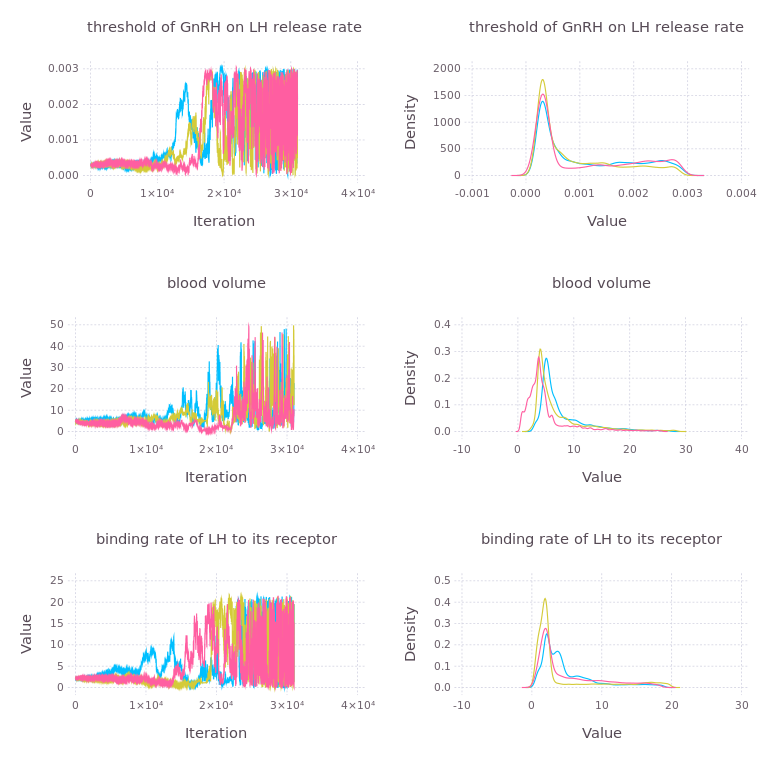

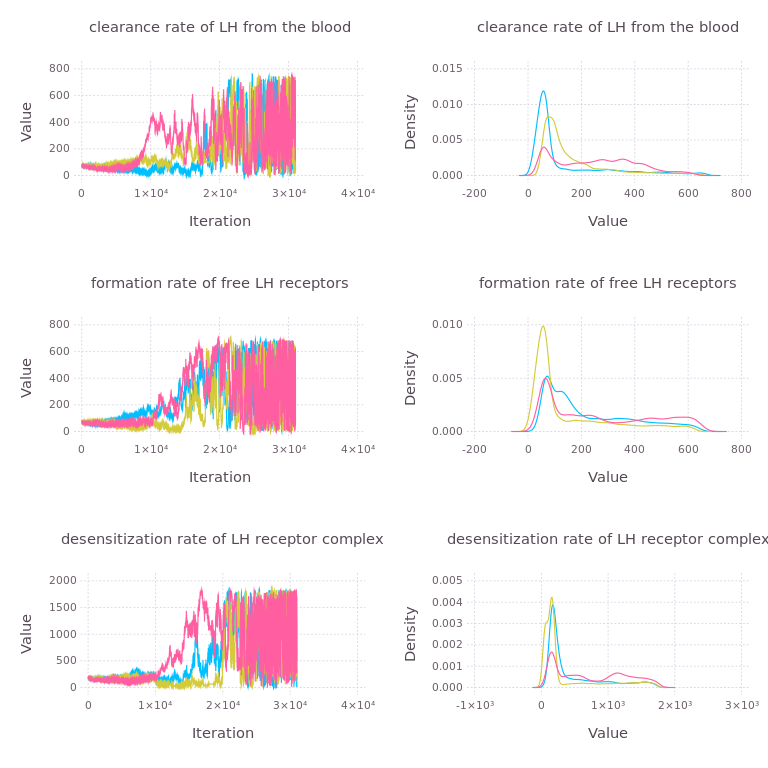

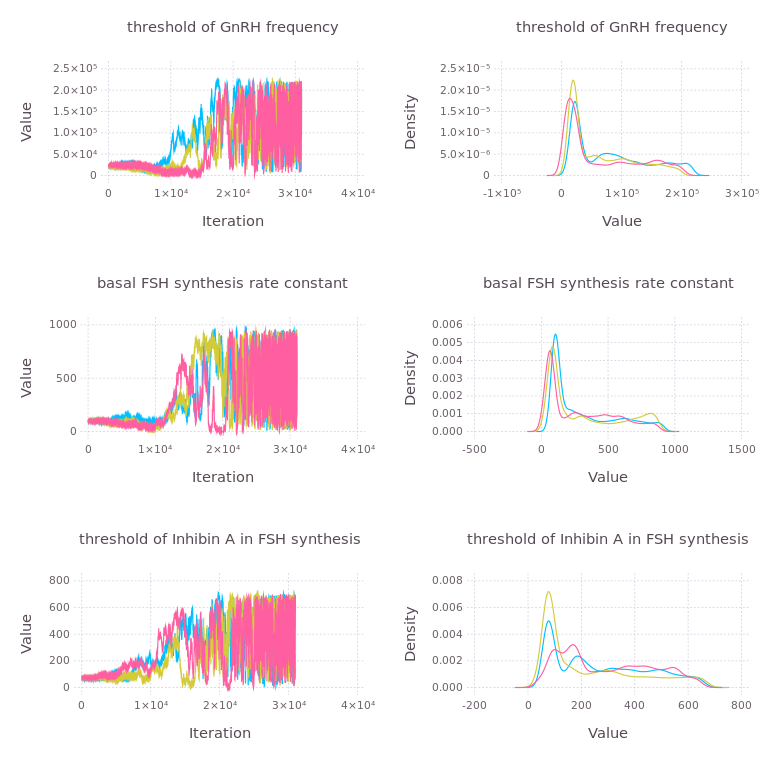

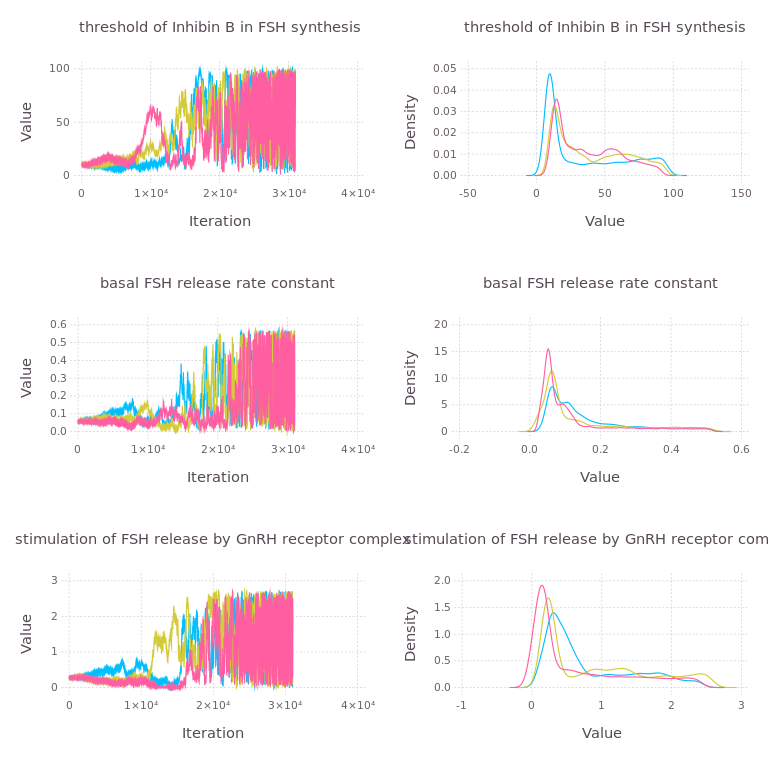

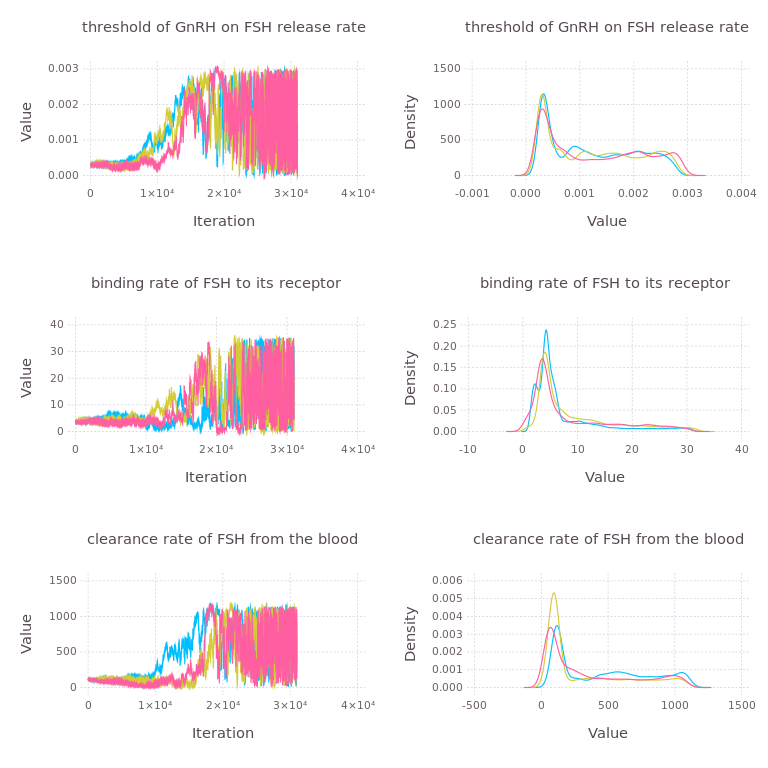

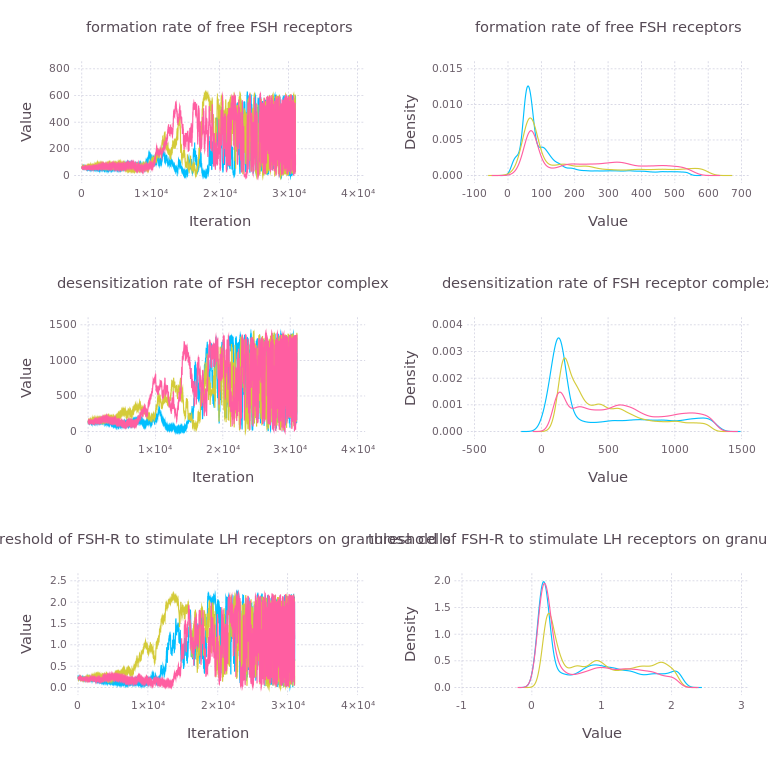

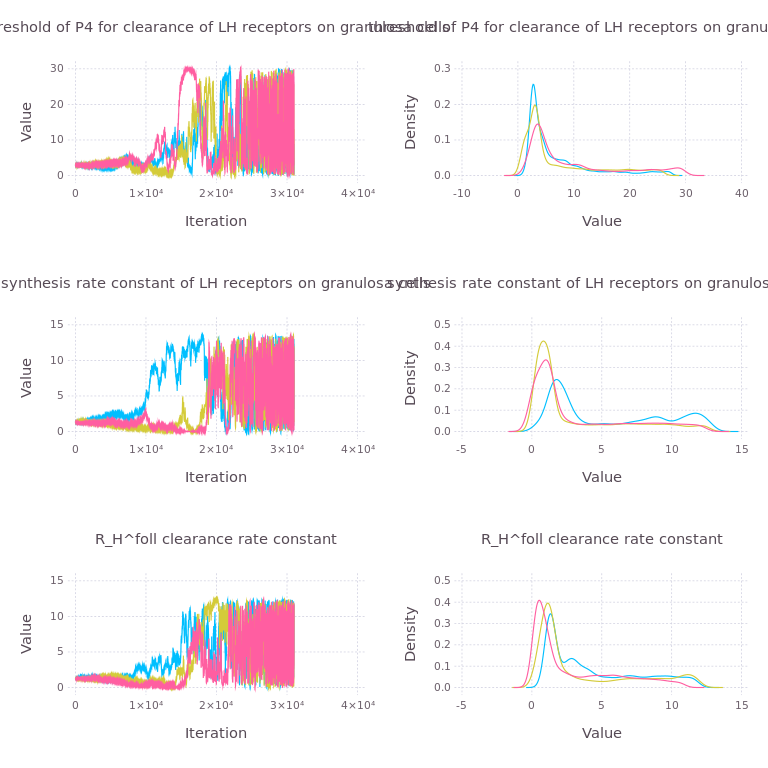

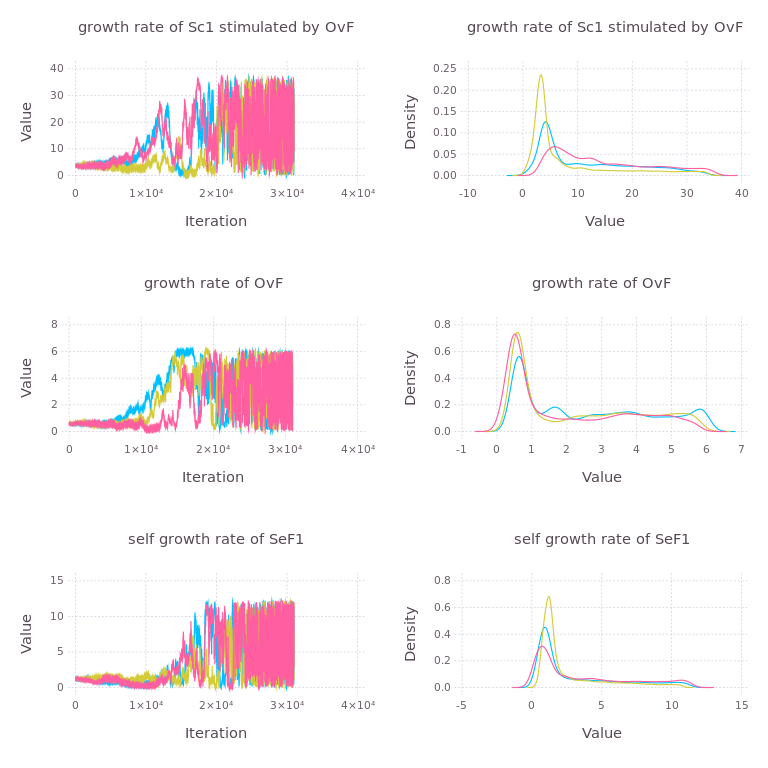

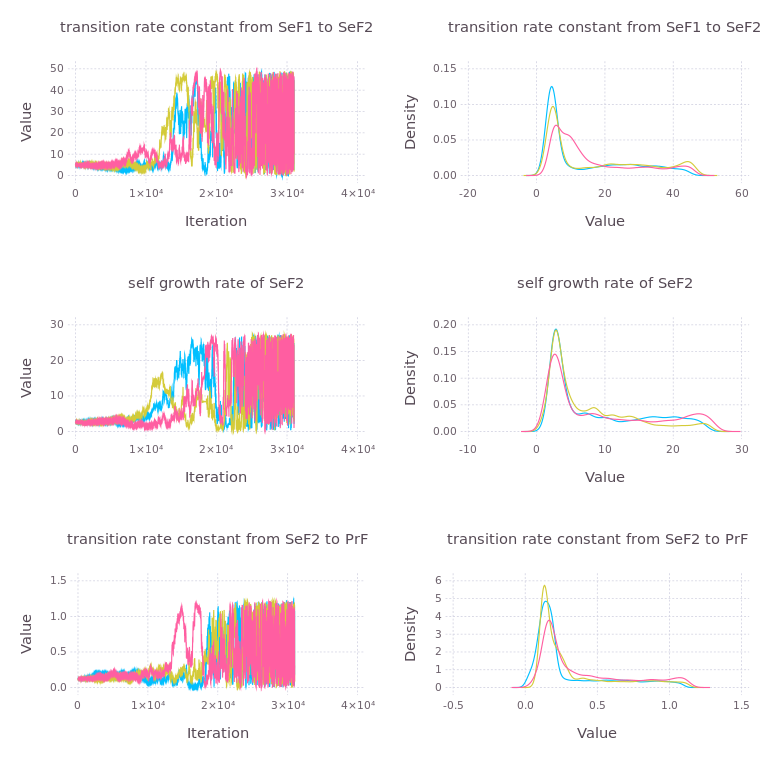

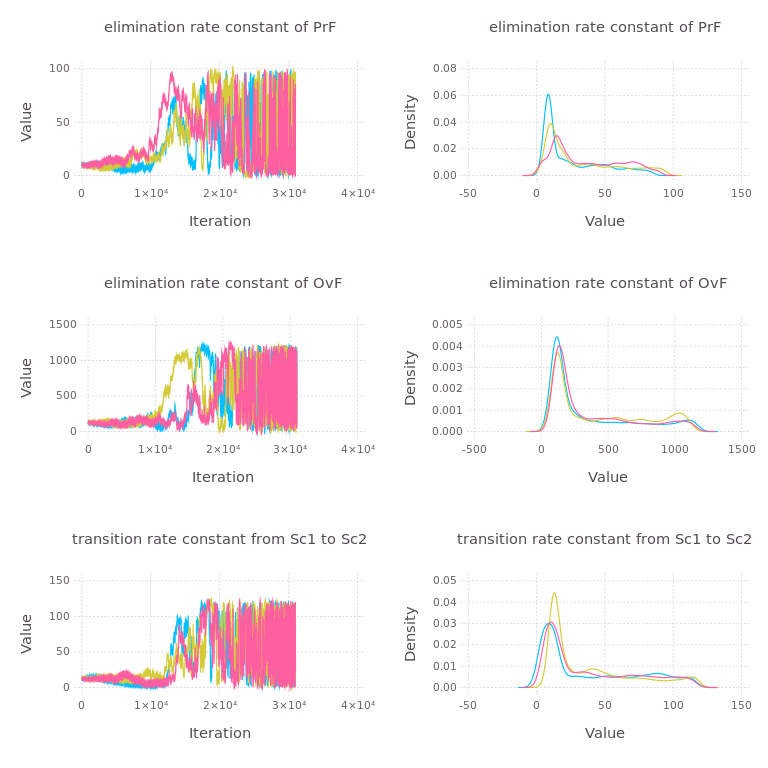

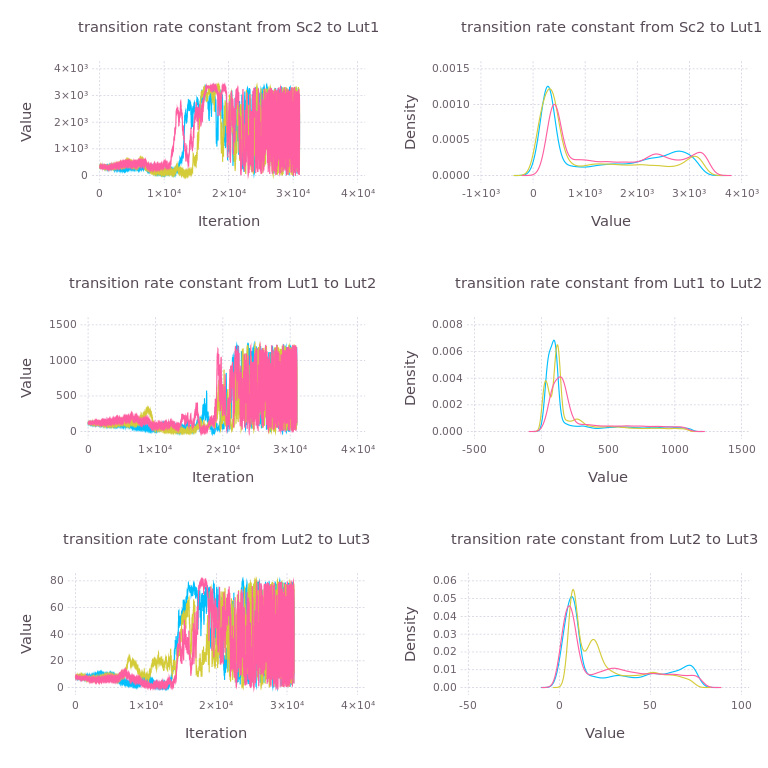

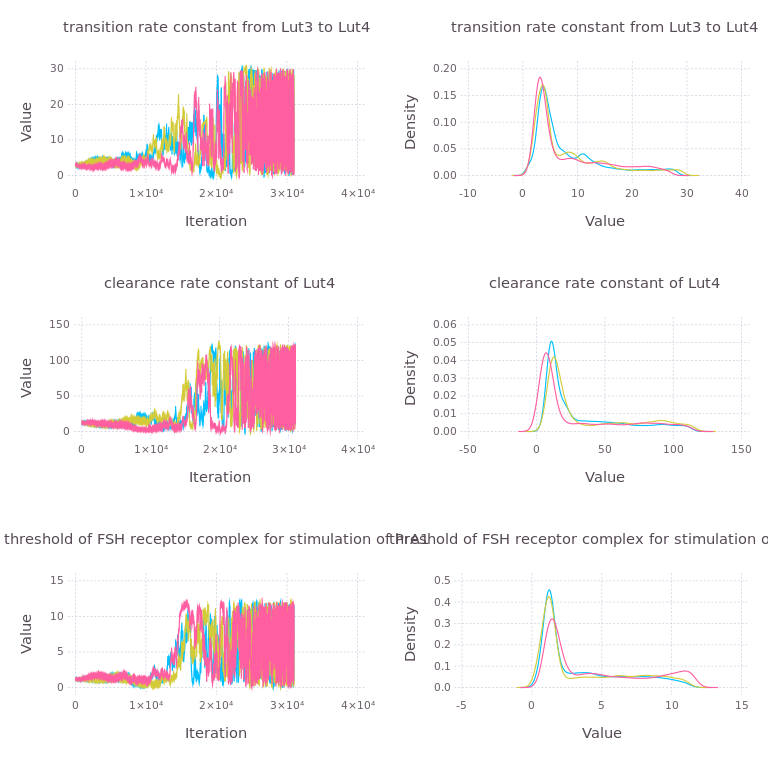

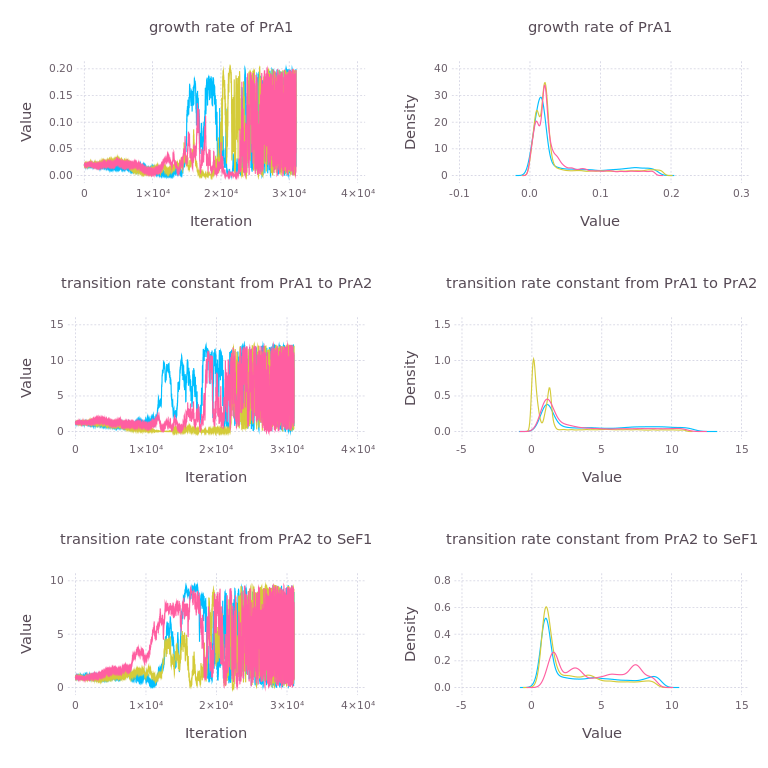

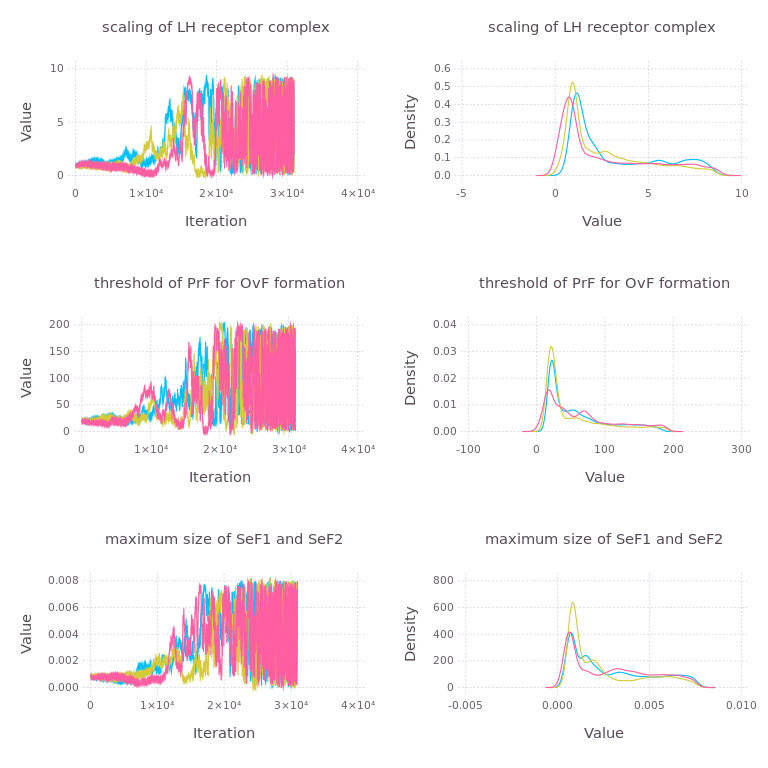

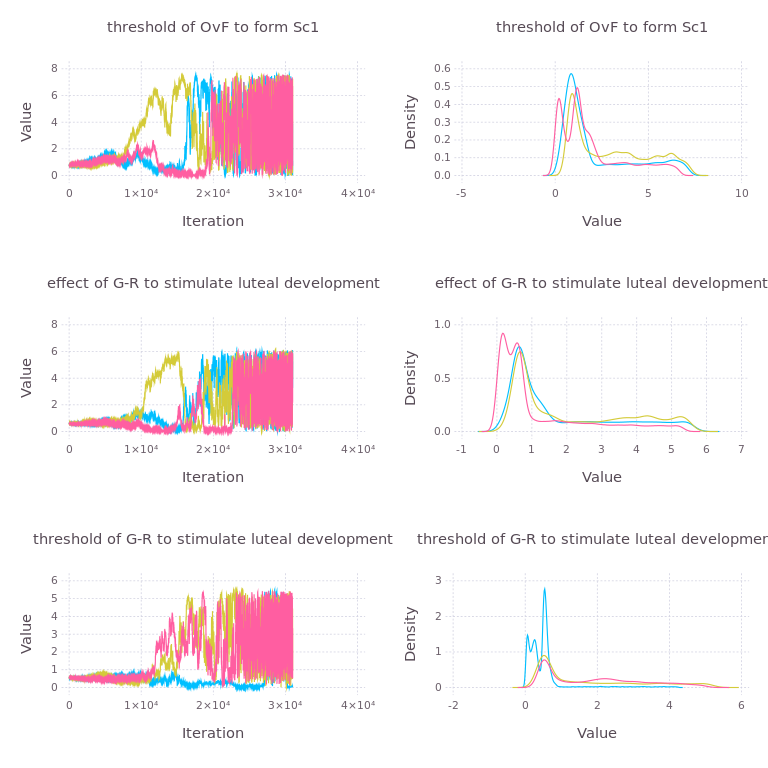

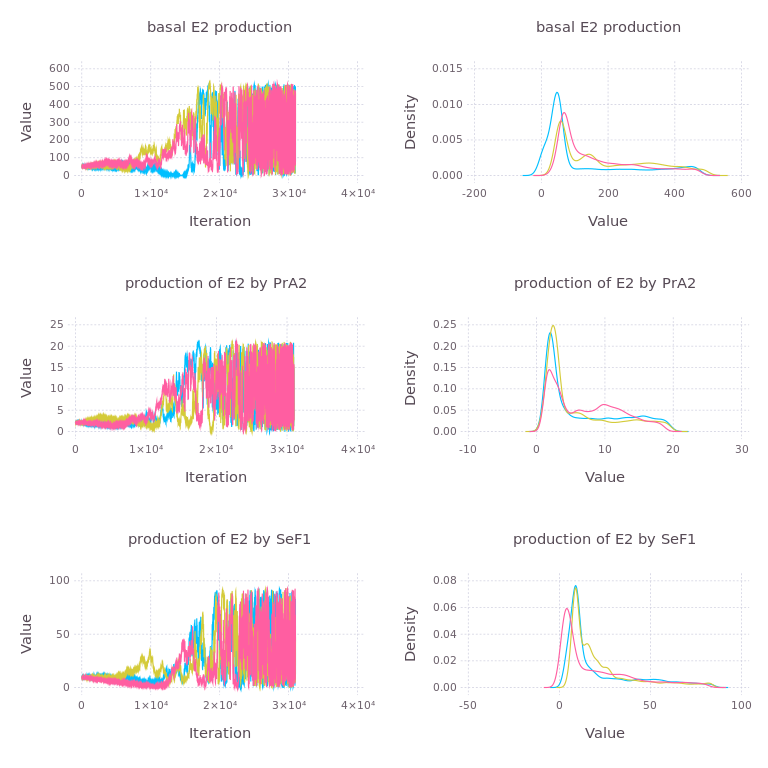

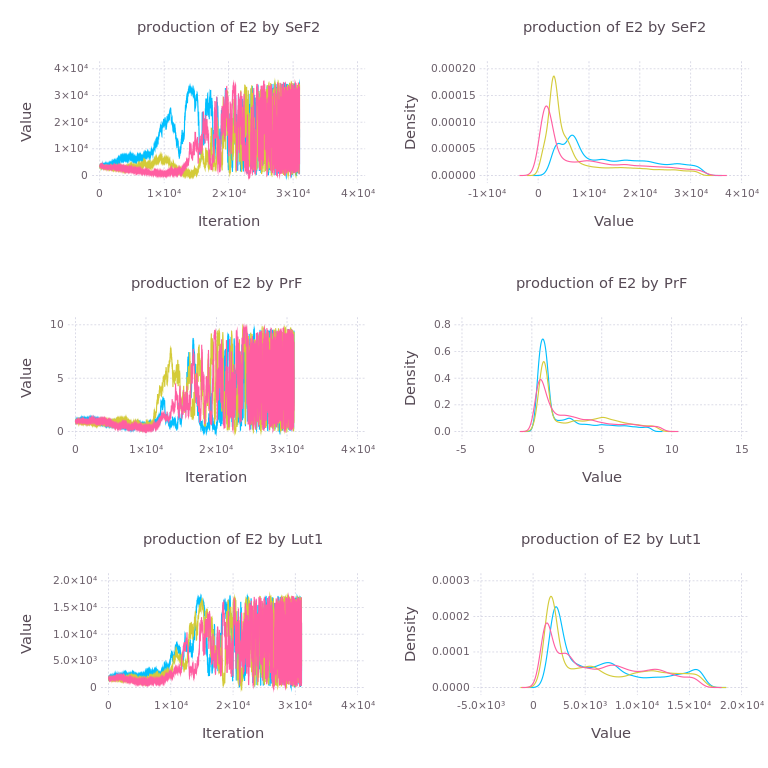

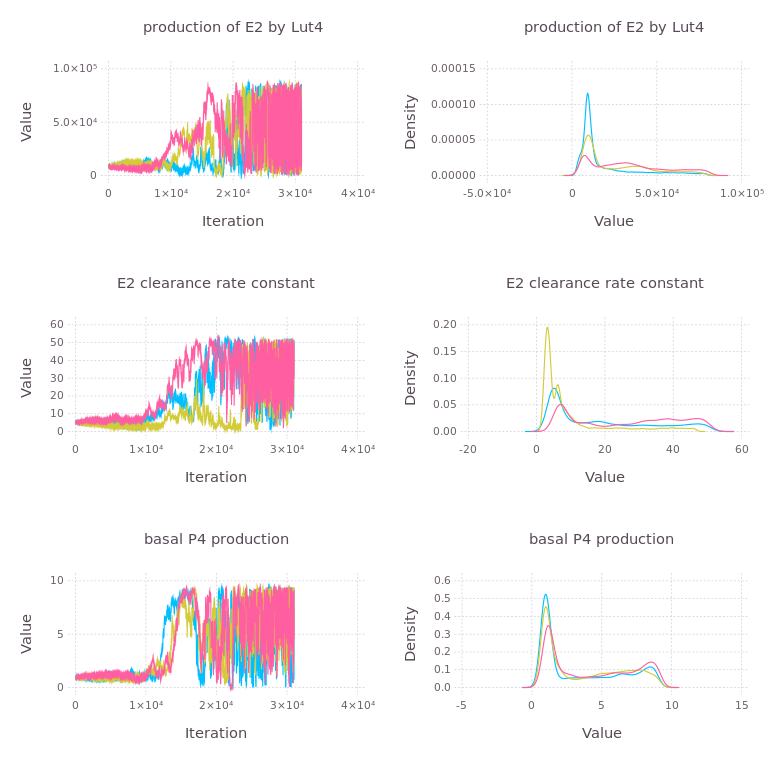

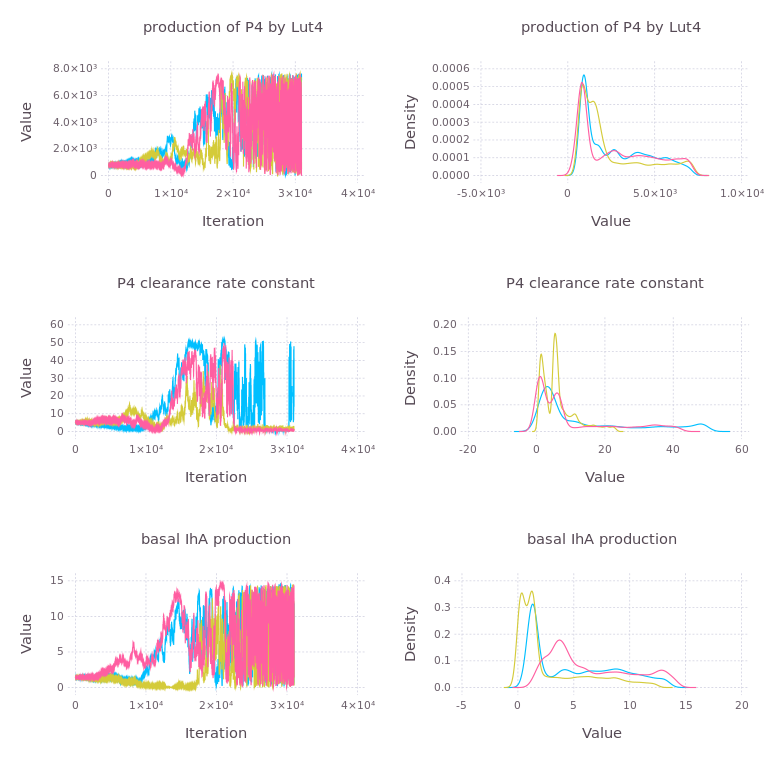

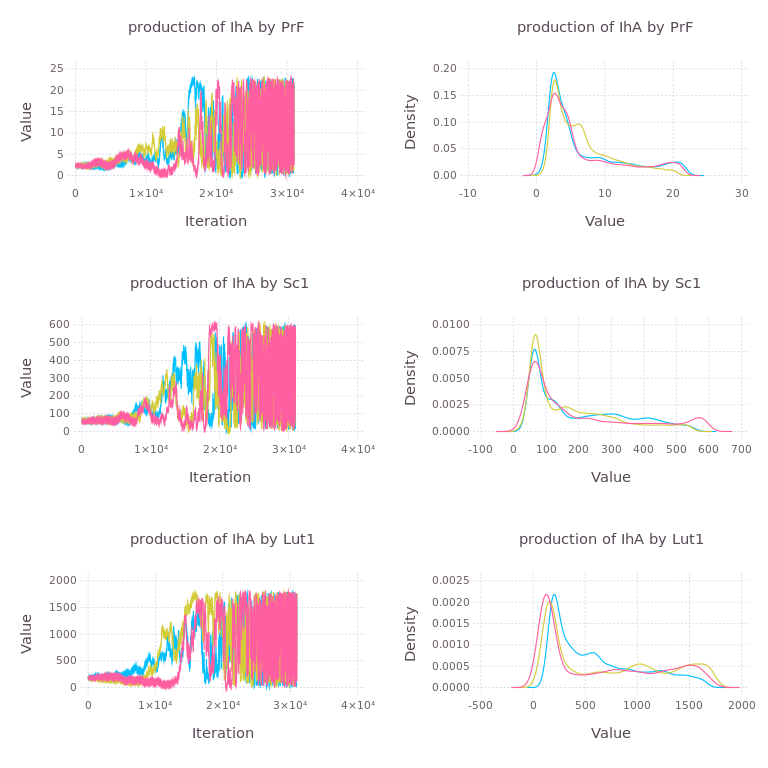

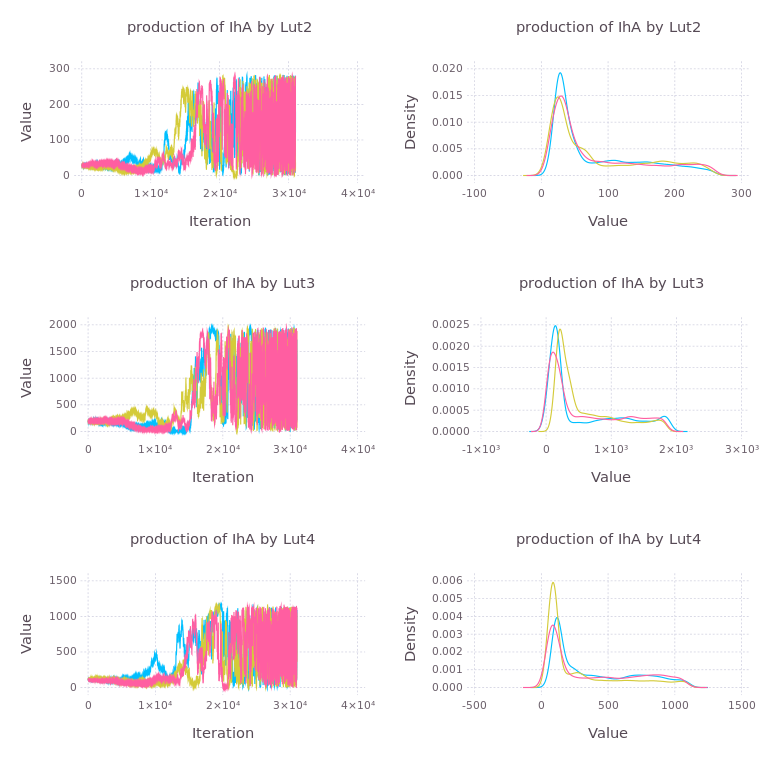

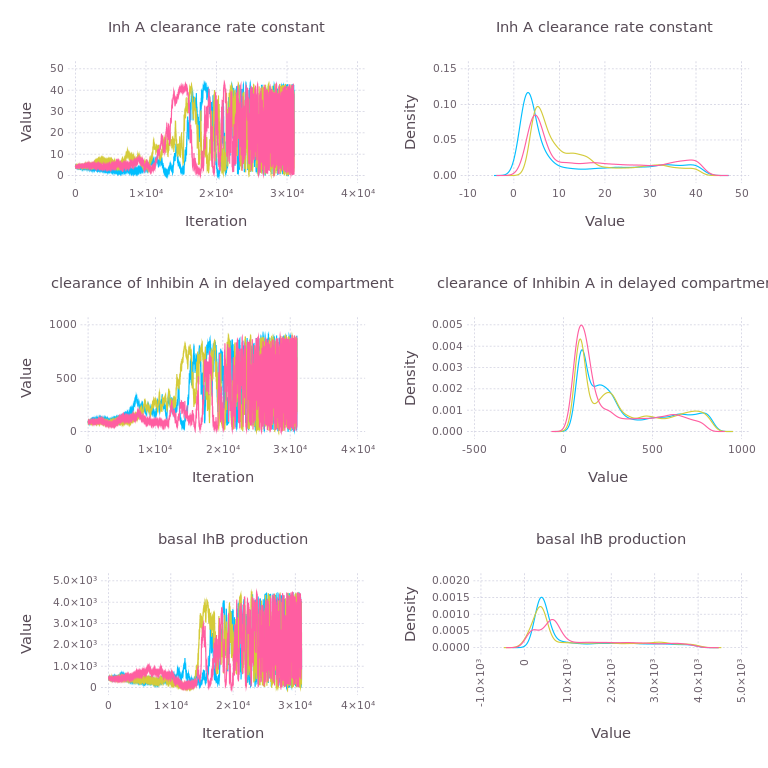

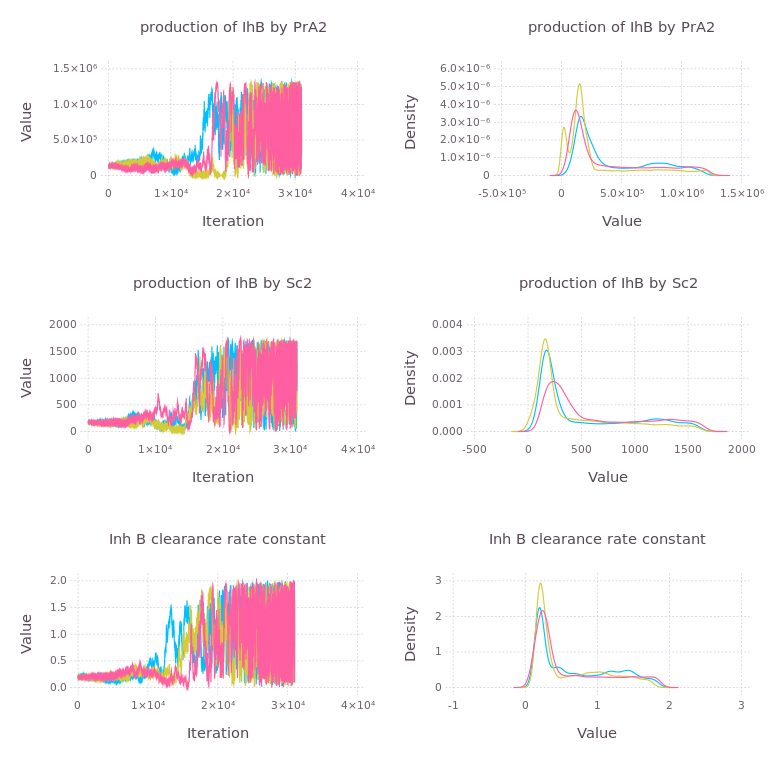

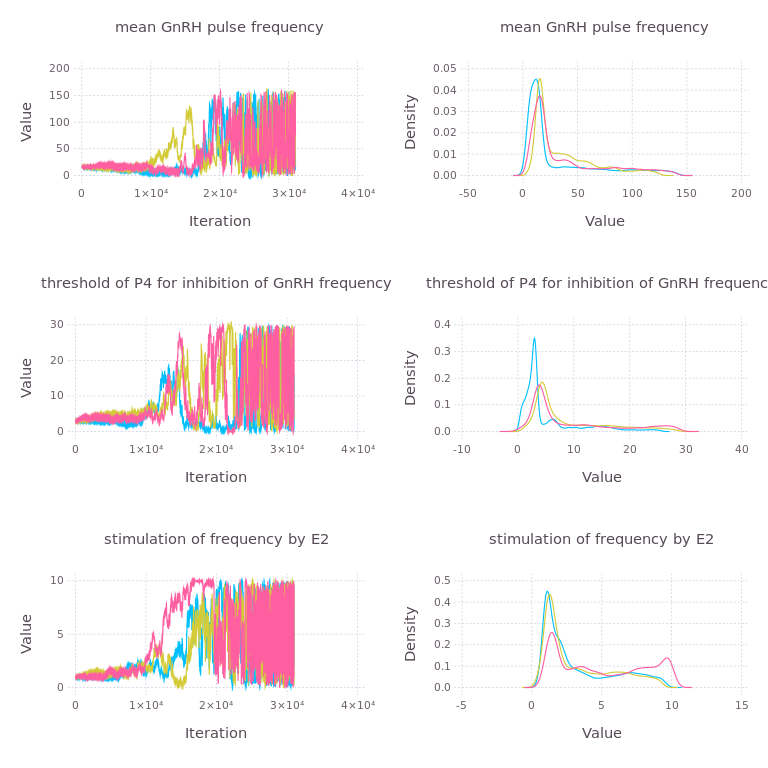

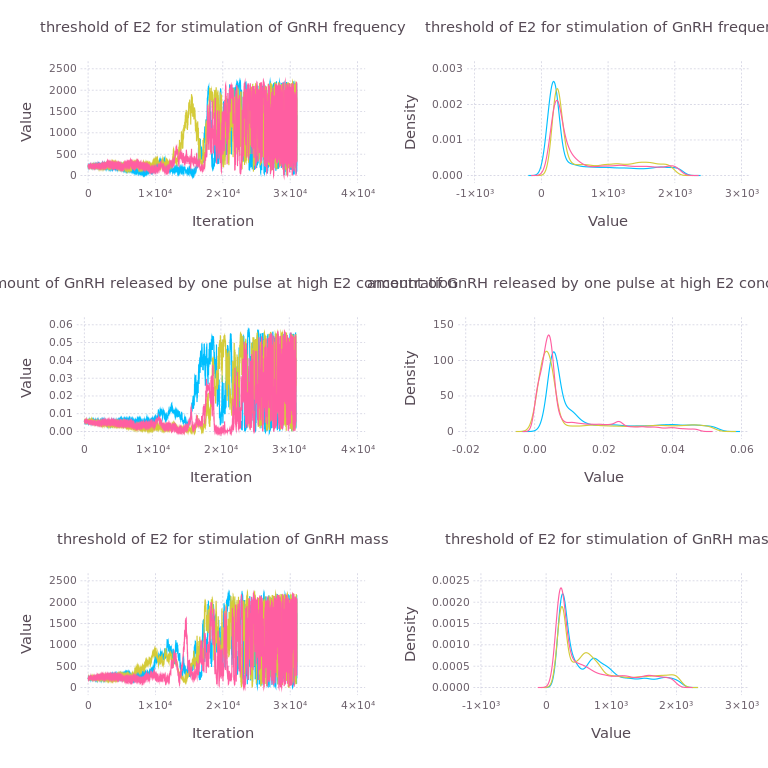

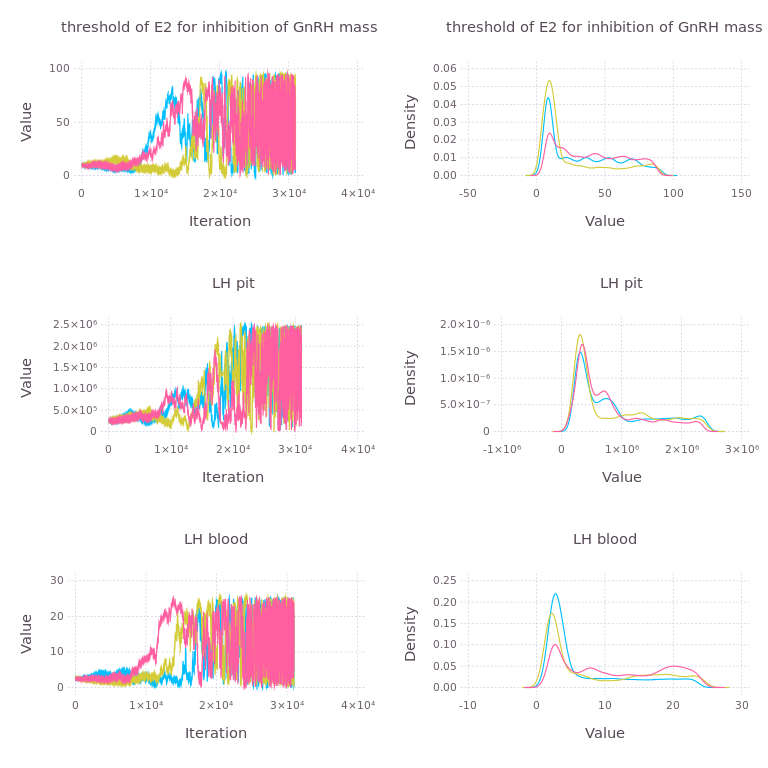

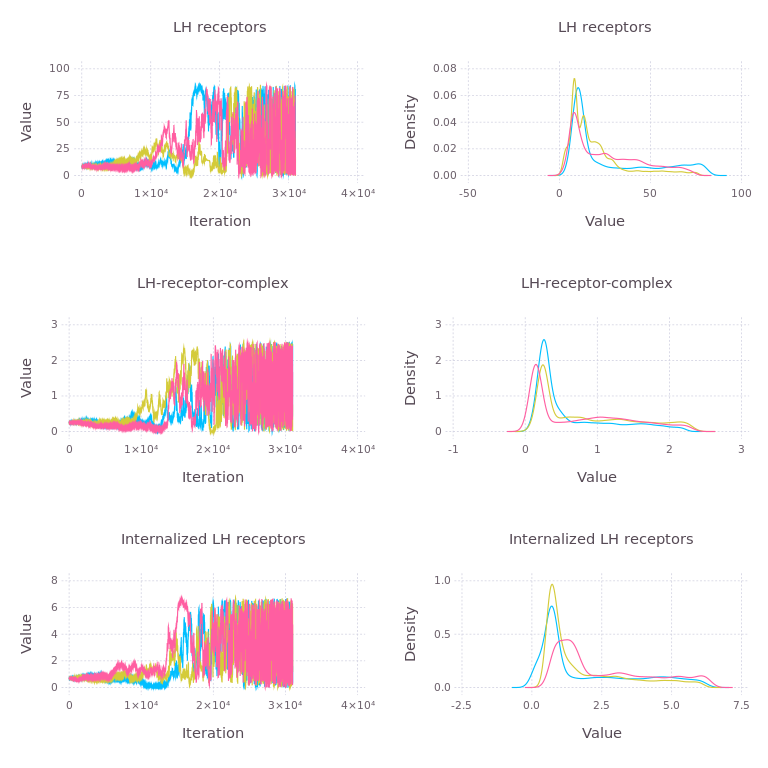

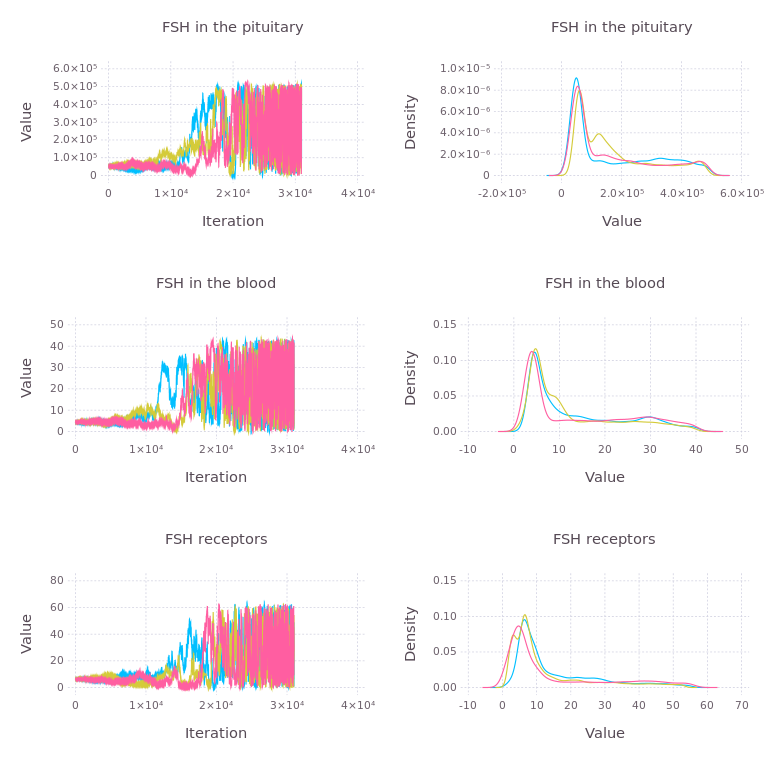

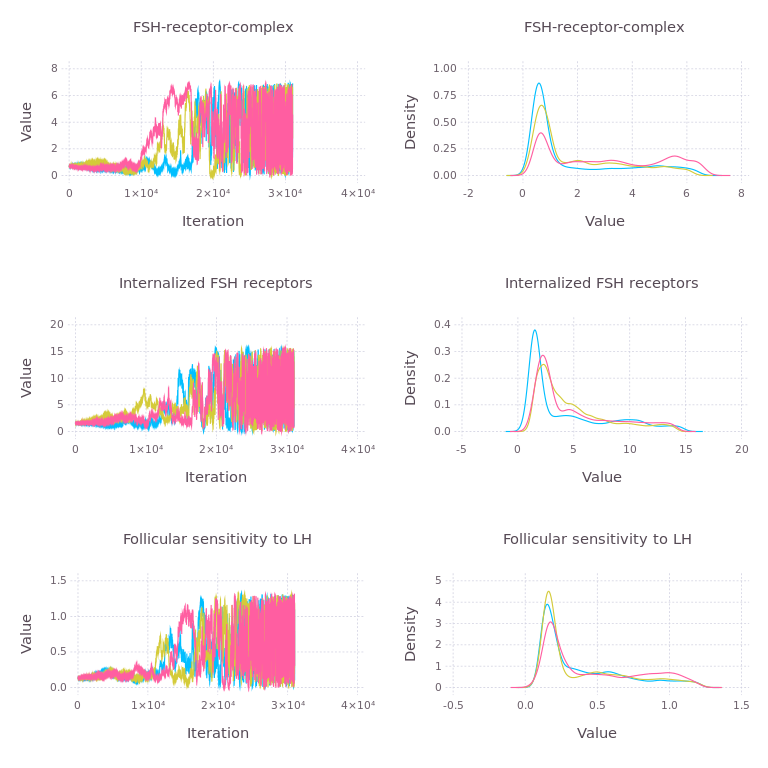

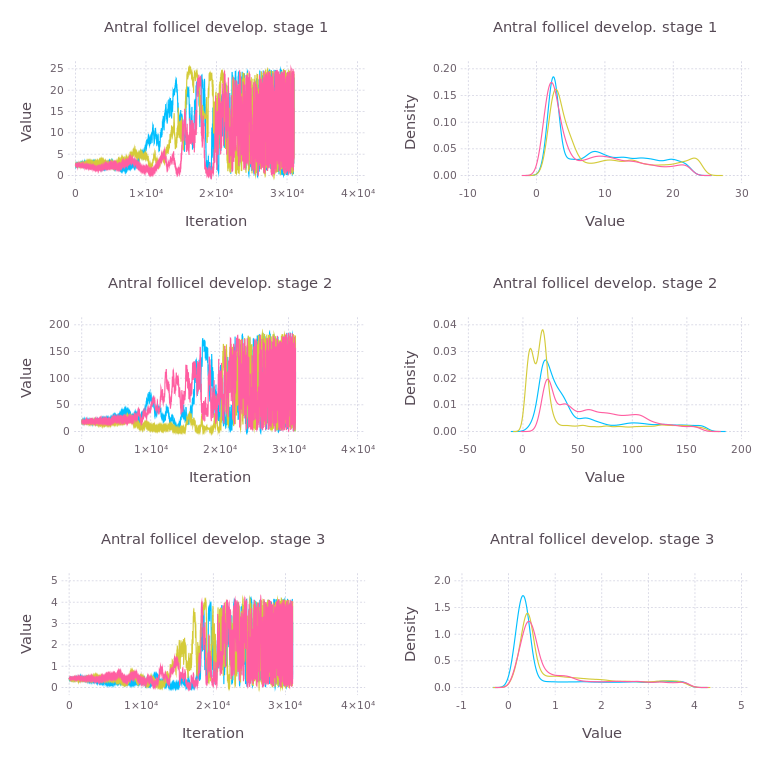

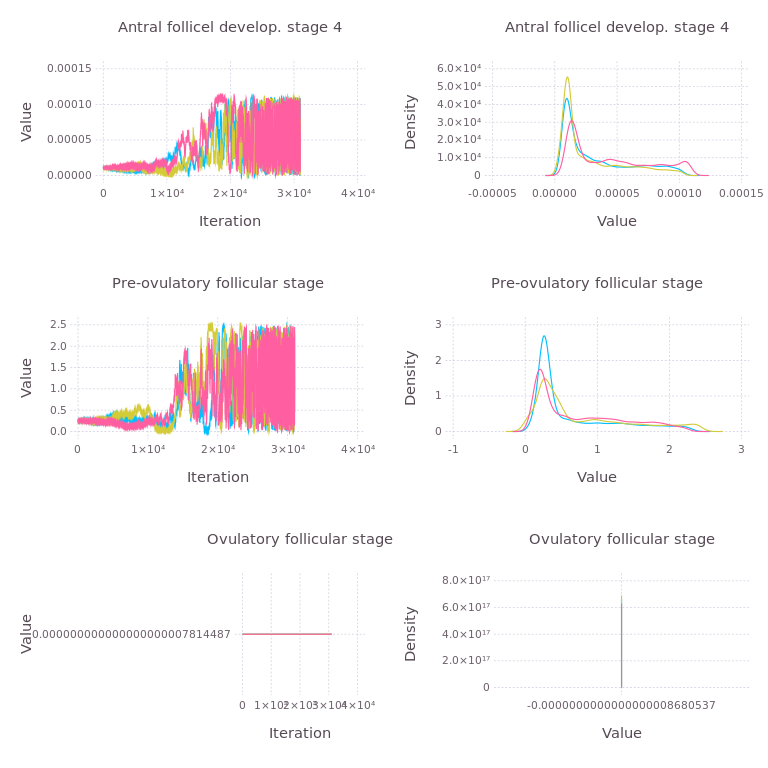

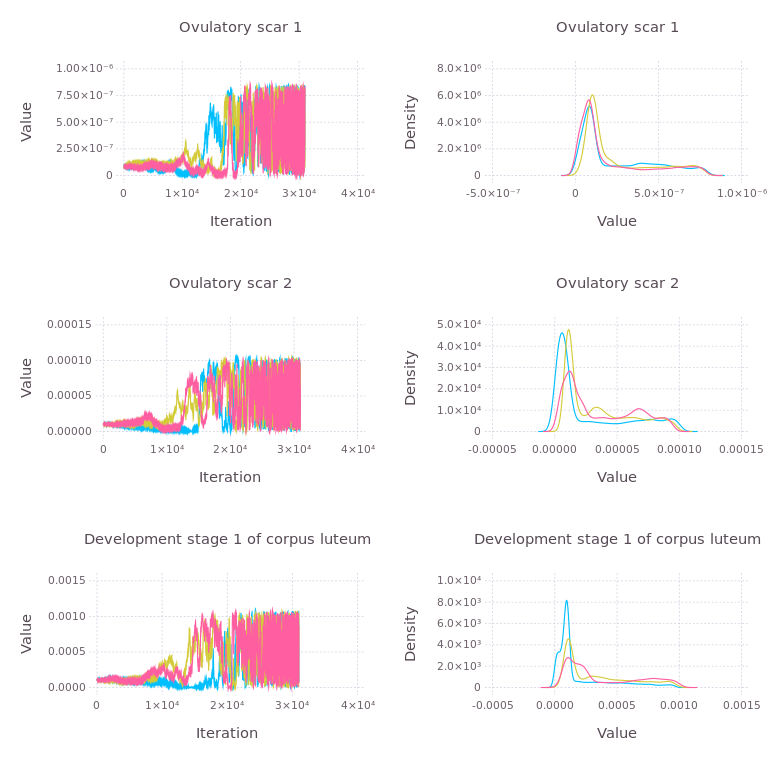

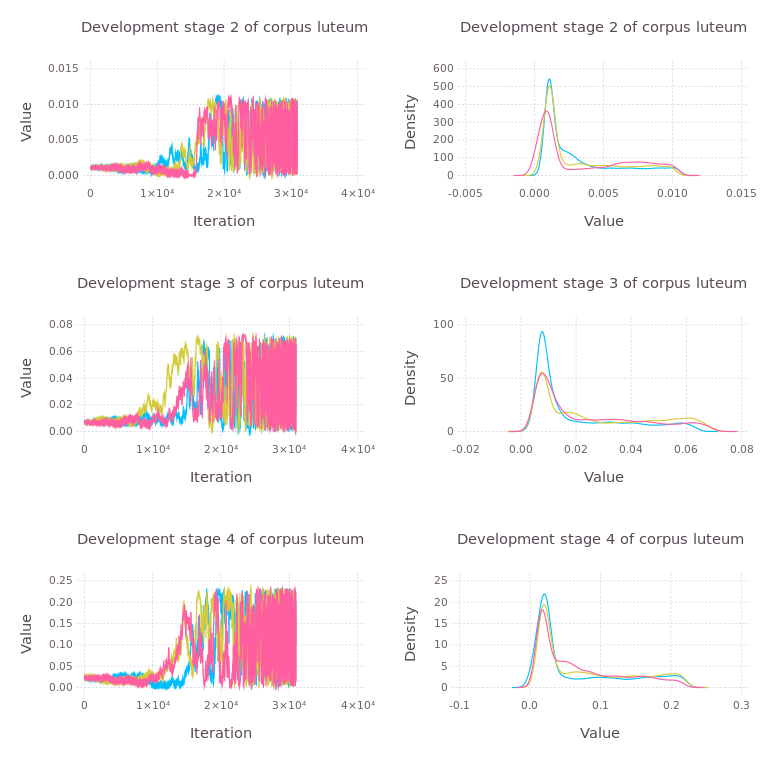

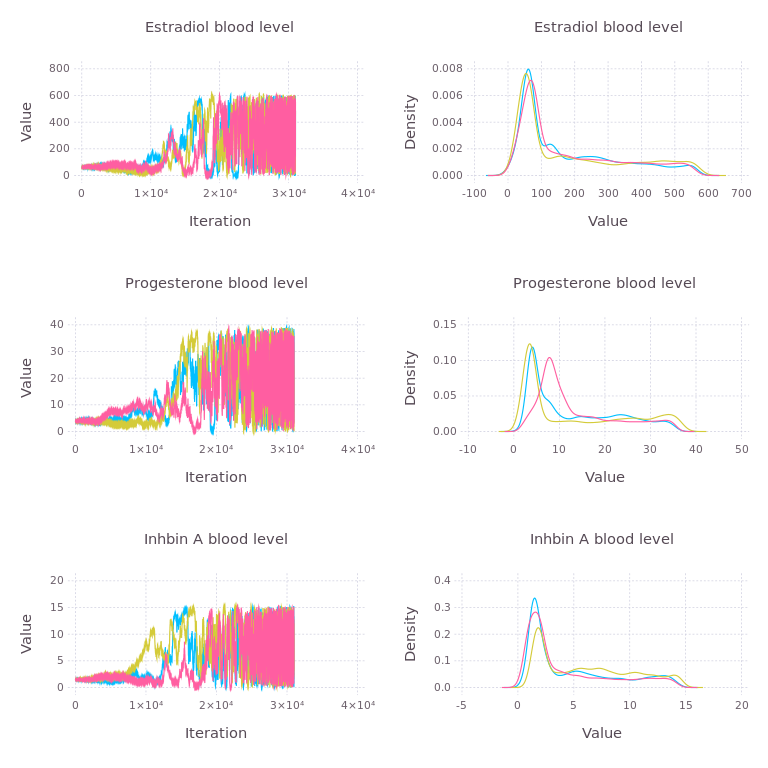

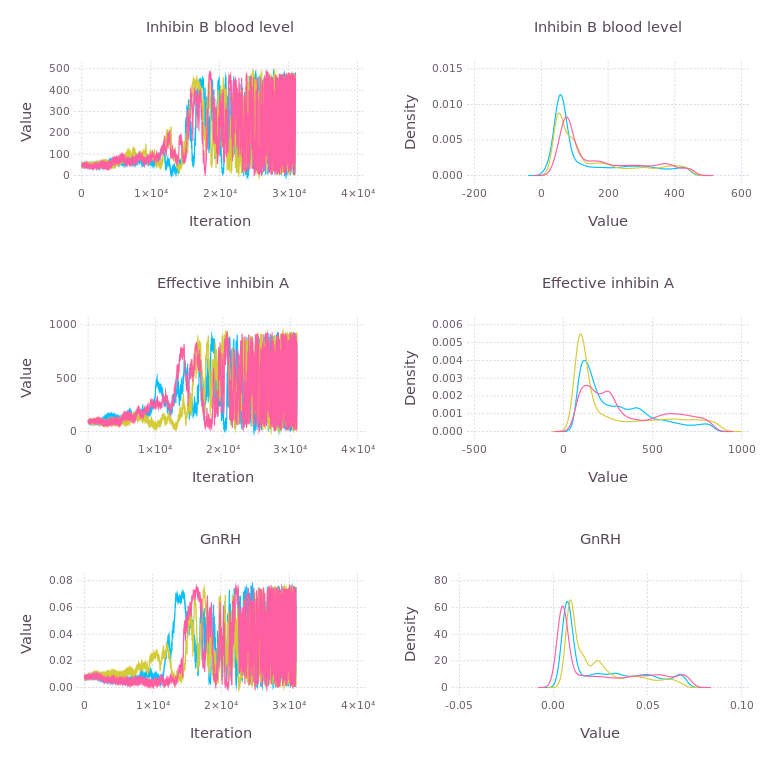

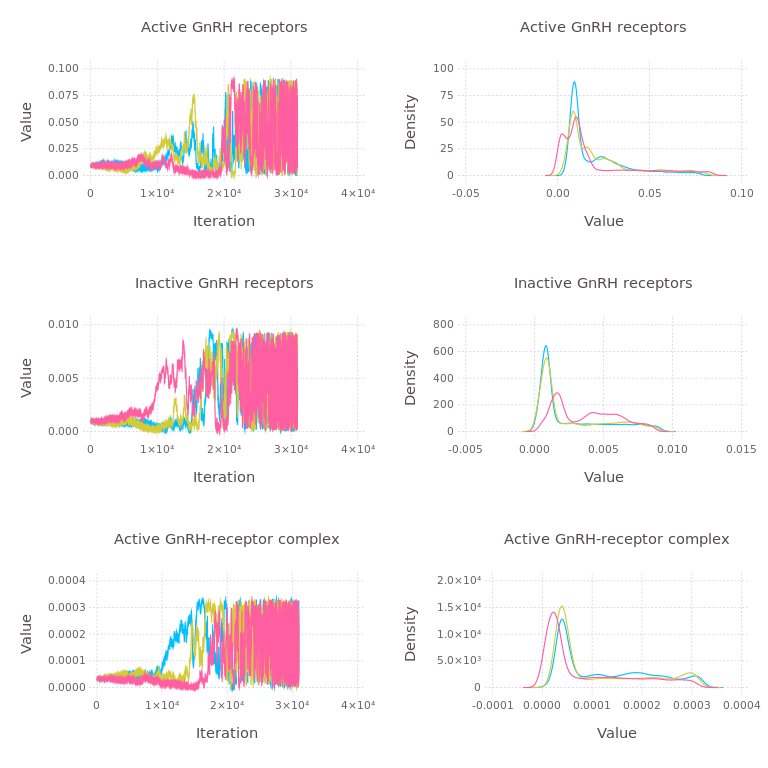

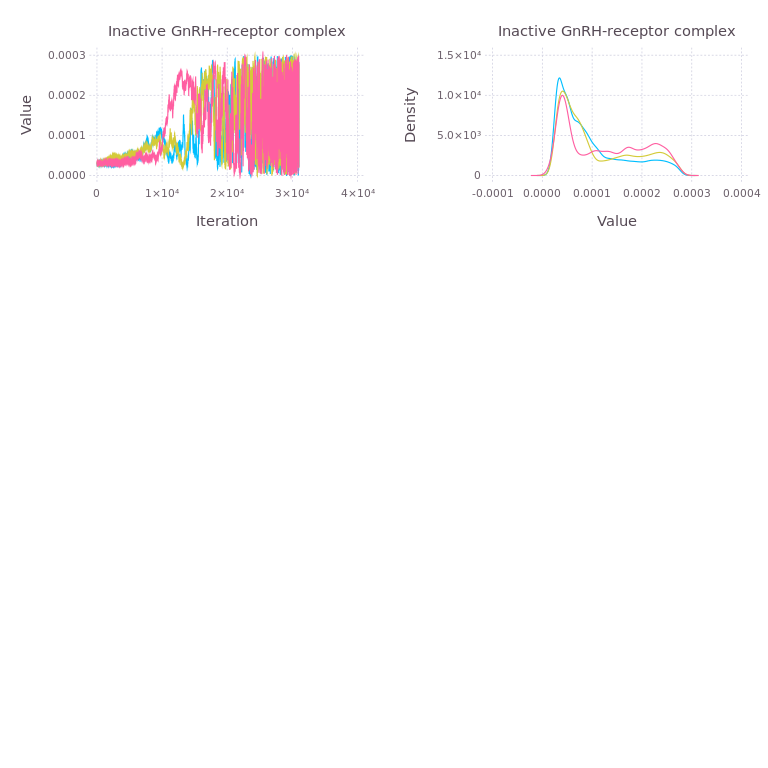

[1.0,1.0,1.0]
421.281880 seconds (4.75 G allocations: 140.213 GB, 11.42% gc time)


In [38]:
file = newestjld()
println("file: ", file)
@time mcs = load(file)["mc"] |> mergepersons
mcs = Chains(mcs, names = vcat(parameternames[SAMPLEPARMS], speciesnames))

println("size: ", size(mcs))
println("acc:  ", map(x->round(x,2),acceptance(mcs)))
@time draw(plot(mcs[:,[1:82,83:115],:]), ask=false, fmt=:png)